<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/DEEP-LEARNING/blob/main/MMCNN25_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import splitfolders

In [ ]:
input1='D:\input_dataset'
output1='D:\input_dataset_sp'
splitfolders.ratio(input1,output=output1,seed=1337,ratio=(.8,.1,.1),group_prefix=None)

Copying files: 2700 files [00:20, 133.76 files/s]


In [ ]:
input_shape=(100,100,3)
batch_size = 32

In [ ]:
train_data_dir = "D:/input_dataset_sp/train"
valid_data_dir = "D:/input_dataset_sp/val"
test_data_dir = "D:/input_dataset_sp/test"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(100, 100),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 2160 images belonging to 27 classes.
Found 270 images belonging to 27 classes.
Found 270 images belonging to 27 classes.


In [ ]:
model=Sequential([Conv2D(16,kernel_size=(3,3),input_shape=(100,100,3),activation='relu'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(2,2)),
                BatchNormalization(),
                Conv2D(32,kernel_size=(3,3),activation='relu'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(2,2)),
                BatchNormalization(),
                Conv2D(64,kernel_size=(3,3),activation='relu'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(2,2)),
                BatchNormalization(),
                Conv2D(128,kernel_size=(3,3),activation='relu'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(2,2)),
                BatchNormalization(),
                Flatten(),
                Dense(128,activation=('relu')),
                Dense(64,activation=('relu')),
                Dense(train_generator.num_classes,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 49, 49, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mae'])

In [ ]:
checkpoint = ModelCheckpoint("D:/best_model1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
print(train_generator.class_indices)

{'10ngou': 0, '11thou': 1, '12wai': 2, '13yang': 3, '14huk': 4, '15un': 5, '16ee': 6, '17fam': 7, '18atiya': 8, '19gok': 9, '1kok': 10, '20jham': 11, '21rai': 12, '22baa': 13, '23jill': 14, '24dill': 15, '25ghou': 16, '26dhou': 17, '27bham': 18, '2sam': 19, '3lai': 20, '4mit': 21, '5paa': 22, '6na': 23, '7chin': 24, '8tin': 25, '9khou': 26}


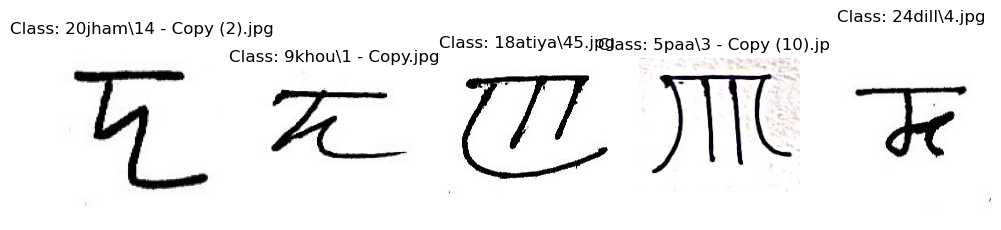

In [ ]:
num_images_to_display = 5
random_indexes = np.random.choice(len(train_generator.filenames), num_images_to_display)

plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indexes):
    plt.subplot(1, num_images_to_display, i + 1)
    img_path = train_data_dir + '/' + train_generator.filenames[index]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title("Class: {}".format(train_generator.filenames[index].split('/')[0]))
    plt.axis('off')
plt.show()

In [ ]:
history = model.fit(train_generator,
                    epochs=77,
                    validation_data=validation_generator,verbose=1, callbacks=[checkpoint])

Epoch 1/77


68/68 [==============================] - ETA: 0s - loss: 0.9249 - accuracy: 0.7532 - mae: 0.0275
Epoch 1: val_accuracy improved from -inf to 0.05185, saving model to D:/best_model1.h5
68/68 [==============================] - 27s 297ms/step - loss: 0.9249 - accuracy: 0.7532 - mae: 0.0275 - val_loss: 4.6406 - val_accuracy: 0.0519 - val_mae: 0.0710


C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/77
68/68 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9713 - mae: 0.0047
Epoch 2: val_accuracy improved from 0.05185 to 0.09259, saving model to D:/best_model1.h5
68/68 [==============================] - 19s 285ms/step - loss: 0.1166 - accuracy: 0.9713 - mae: 0.0047 - val_loss: 6.5379 - val_accuracy: 0.0926 - val_mae: 0.0703
Epoch 3/77
68/68 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9843 - mae: 0.0025
Epoch 3: val_accuracy did not improve from 0.09259
68/68 [==============================] - 19s 280ms/step - loss: 0.0579 - accuracy: 0.9843 - mae: 0.0025 - val_loss: 7.1146 - val_accuracy: 0.0815 - val_mae: 0.0685
Epoch 4/77
68/68 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9921 - mae: 0.0016
Epoch 4: val_accuracy improved from 0.09259 to 0.10741, saving model to D:/best_model1.h5
68/68 [==============================] - 20s 286ms/step - loss: 0.0361 - accuracy: 0.9921 - mae: 0.0016 - val_loss: 6

Epoch 26/77
68/68 [==============================] - ETA: 0s - loss: 2.4075e-04 - accuracy: 1.0000 - mae: 1.7654e-05
Epoch 26: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 278ms/step - loss: 2.4075e-04 - accuracy: 1.0000 - mae: 1.7654e-05 - val_loss: 0.0043 - val_accuracy: 0.9963 - val_mae: 2.4250e-04
Epoch 27/77
68/68 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9958 - mae: 3.0540e-04
Epoch 27: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 280ms/step - loss: 0.0084 - accuracy: 0.9958 - mae: 3.0540e-04 - val_loss: 0.0150 - val_accuracy: 0.9889 - val_mae: 6.3411e-04
Epoch 28/77
68/68 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9907 - mae: 0.0010    
Epoch 28: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 283ms/step - loss: 0.0331 - accuracy: 0.9907 - mae: 0.0010 - val_loss: 0.2302 - val_accuracy: 0.9444 - val_m

68/68 [==============================] - ETA: 0s - loss: 2.3375e-04 - accuracy: 1.0000 - mae: 1.5949e-05
Epoch 50: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 283ms/step - loss: 2.3375e-04 - accuracy: 1.0000 - mae: 1.5949e-05 - val_loss: 0.0614 - val_accuracy: 0.9889 - val_mae: 8.2667e-04
Epoch 51/77
68/68 [==============================] - ETA: 0s - loss: 1.8602e-04 - accuracy: 1.0000 - mae: 1.3217e-05
Epoch 51: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 283ms/step - loss: 1.8602e-04 - accuracy: 1.0000 - mae: 1.3217e-05 - val_loss: 0.0564 - val_accuracy: 0.9889 - val_mae: 8.2091e-04
Epoch 52/77
68/68 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9991 - mae: 1.3869e-04
Epoch 52: val_accuracy did not improve from 1.00000
68/68 [==============================] - 20s 298ms/step - loss: 0.0088 - accuracy: 0.9991 - mae: 1.3869e-04 - val_loss: 0.0783 - val_accuracy: 0.9889 - val_m

68/68 [==============================] - 19s 282ms/step - loss: 0.0142 - accuracy: 0.9991 - mae: 1.5510e-04 - val_loss: 0.0437 - val_accuracy: 0.9889 - val_mae: 9.7576e-04
Epoch 75/77
68/68 [==============================] - ETA: 0s - loss: 9.1235e-04 - accuracy: 0.9995 - mae: 5.3905e-05
Epoch 75: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 283ms/step - loss: 9.1235e-04 - accuracy: 0.9995 - mae: 5.3905e-05 - val_loss: 0.0301 - val_accuracy: 0.9889 - val_mae: 6.3130e-04
Epoch 76/77
68/68 [==============================] - ETA: 0s - loss: 5.1057e-04 - accuracy: 1.0000 - mae: 3.2842e-05
Epoch 76: val_accuracy did not improve from 1.00000
68/68 [==============================] - 19s 285ms/step - loss: 5.1057e-04 - accuracy: 1.0000 - mae: 3.2842e-05 - val_loss: 0.0293 - val_accuracy: 0.9889 - val_mae: 6.1102e-04
Epoch 77/77
68/68 [==============================] - ETA: 0s - loss: 7.2109e-05 - accuracy: 1.0000 - mae: 5.3060e-06
Epoch 77: val_accurac

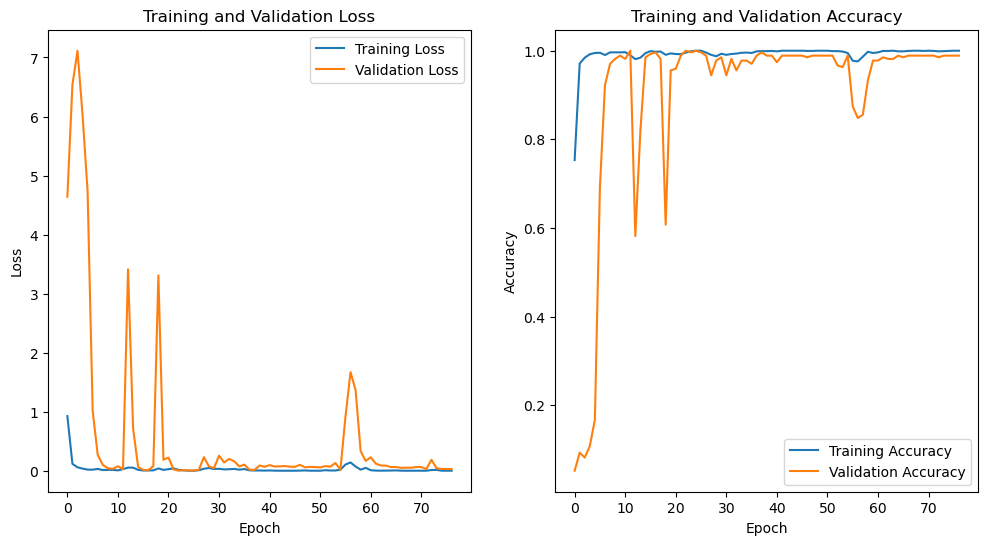

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
loss, accuracy, mae = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Mean Absolute Error:", mae)

270/270 [==============================] - 4s 13ms/step - loss: 0.0307 - accuracy: 0.9963 - mae: 2.7542e-04
Test Loss: 0.030713699758052826
Test Accuracy: 0.9962962865829468
Test Mean Absolute Error: 0.0002754211600404233


In [ ]:
model.save('D:/MMCNN20.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('D:/best_model1.h5')
evaluation= model.evaluate(test_generator, verbose=2)
test_loss = evaluation[0]
test_accuracy = evaluation[1]
test_mae = evaluation[2]

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test MAE:", test_mae)

270/270 - 3s - loss: 0.0605 - accuracy: 0.9741 - mae: 0.0024 - 3s/epoch - 12ms/step
Test Loss: 0.06048143282532692
Test Accuracy: 0.9740740656852722
Test MAE: 0.0023500684183090925


270/270 [==============================] - 3s 9ms/step


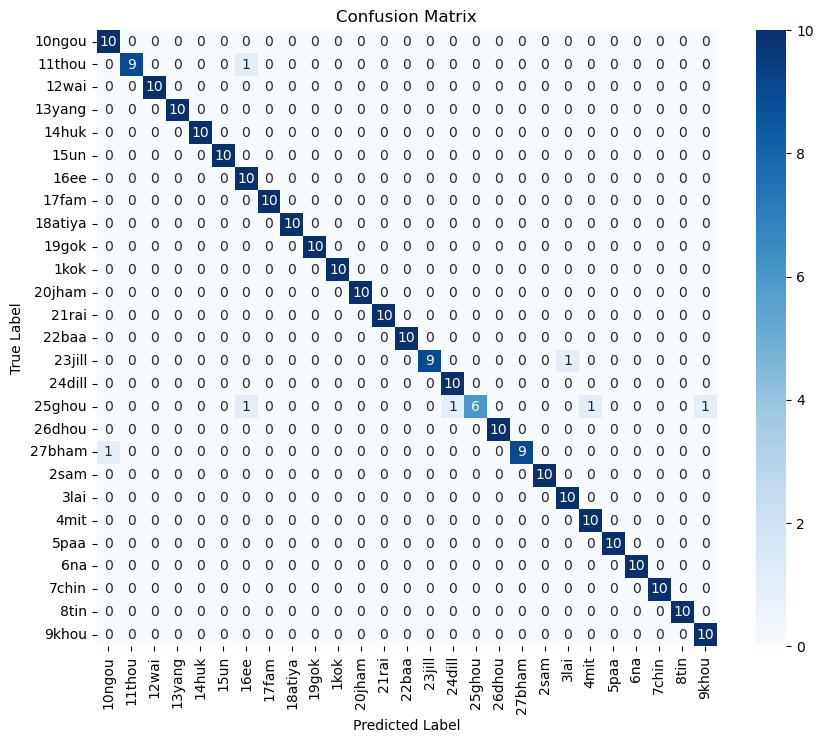

In [ ]:
import seaborn as sns
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()